In [1]:
from pymongo import MongoClient
import urllib.request
from io import BytesIO
from PIL import Image
from gridfs import GridFSBucket

In [2]:
# db 객체 생성
db = MongoClient().python_test
db


Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'python_test')

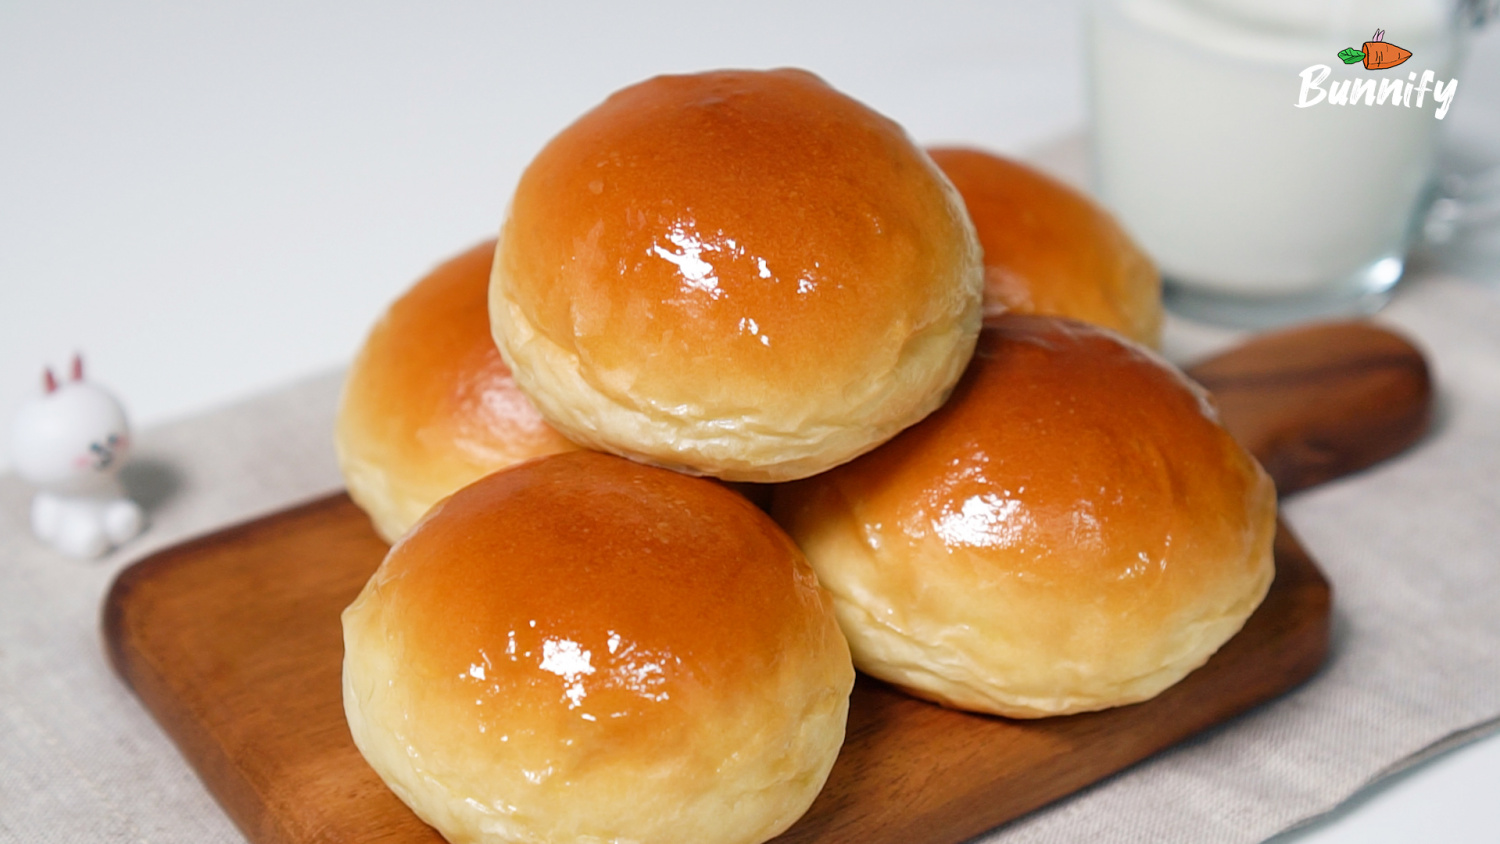

In [10]:
url = 'https://recipe1.ezmember.co.kr/cache/recipe/2020/08/21/3336b0488d63cfff12317af090542b411.jpg'
data = urllib.request.urlopen(url).read()
# print(data)
Image.open(BytesIO(data))


In [4]:
# MongoDB로 파일을 업로드할 객체 생성
bucket = GridFSBucket(db)
bucket

In [5]:
grid_in = bucket.open_upload_stream('result04.jpg', metadata={'contentType':'image/jpg'})

In [6]:
grid_in

In [11]:
grid_in.write(data)
grid_in.close()

In [ ]:
image_list = list(db.fs.files.find())
print(image_list)
print(len(image_list))

In [ ]:
from gridfs import GridFS
fs = GridFS(db)
f = fs.get_last_version(filename='result03.jpg')
dataImage = f.read()
# print(dataImage)

real_image = Image.open(BytesIO(dataImage))
real_image
